In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm_notebook

import os

from collections import defaultdict
import cv2

%matplotlib inline

pd.set_option('display.max_columns', 500)
pd.options.display.float_format = '{:.6f}'.format

import gym
from gym.wrappers import Monitor
import gym_ple

couldn't import doomish
Couldn't import doom


In [2]:
env = gym.make('FlappyBird-v0')

WARN: Environment '<class 'gym_ple.ple_env.PLEEnv'>' has deprecated methods '_step' and '_reset' rather than 'step' and 'reset'. Compatibility code invoked. Set _gym_disable_underscore_compat = True to disable this behavior.


In [3]:
def draw_image(image, image_cut):
    #image_cut = image * mask[:,:,np.newaxis]
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))    
    ax1.imshow(image)
    ax2.imshow(image_cut)

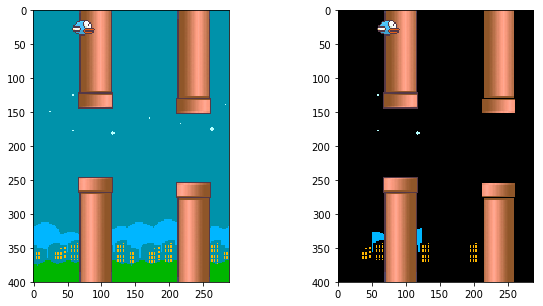

In [9]:
class GrabCutCropper:
    def __get_region_proposals(self, image):
        means = image.mean(axis=0)[:, 2]
        points = np.where(means <= means.max() - 10)[0]

        regions = []
        begin, end = points[0], points[0]

        for point in points[1:]:
            if point - end > 5:
                regions.append((begin, end))
                begin = point
            end = point
        regions.append((begin, points[-1]))

        return regions

    def __make_fg_mask(self, image, regions):
        mask = np.zeros_like(image).astype(bool)

        for begin, end in regions:
            mask[:, begin-5:end+5] = True

        return mask

    def __find_mask_position(self, img, x, width):
        rect = (x, 0, width, 400)

        bgdModel = np.zeros((1,65),np.float64)
        fgdModel = np.zeros((1,65),np.float64)

        mask = np.zeros(img.shape[:2],np.uint8)
        cv2.grabCut(img,mask,rect,bgdModel,fgdModel,3,cv2.GC_INIT_WITH_RECT)
        mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')

        return mask

    def __find_mask(self, image, to_analyze):
        mask = np.zeros(image.shape[:2],np.uint8)

        for x, block_width in to_analyze:
            mask |= self.__find_mask_position(image, x, block_width)

        return mask

    def __find_tubes(self, image):
        regions = self.__get_region_proposals(image)
        refined_regions = []
        refine_width = 6

        for begin, end in regions:
            x = begin - refine_width
            width = end - begin + 2 * refine_width
            refined_regions.append((x, width))

        return self.__find_mask(image, refined_regions)
    
    def __find_birb(self, image):
        rect = (50, 10, 50, 380)

        bgdModel = np.zeros((1,65),np.float64)
        fgdModel = np.zeros((1,65),np.float64)

        mask = np.zeros(image.shape[:2],np.uint8)
        cv2.grabCut(image,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
        mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')

        return mask
    
    def crop_image(self, image):
        mask = self.__find_tubes(image) | self.__find_birb(image)
        image_cut = image * mask[:,:,np.newaxis]
        
        return image_cut
    
init_state = env.reset()

for _ in range(150):
    s, r, done, _ = env.step(env.action_space.sample())

image = s[:-112]
gcc = GrabCutCropper()
cropped = gcc.crop_image(image)
draw_image(image, cropped)

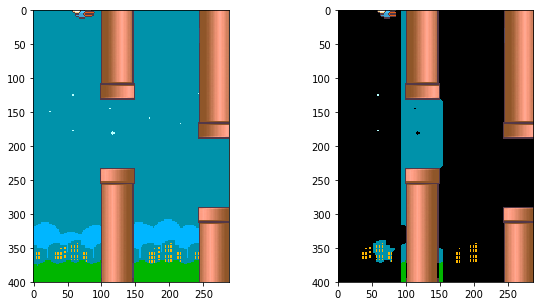

In [13]:
init_state = env.reset()

for _ in range(150):
    s, r, done, _ = env.step(env.action_space.sample())

image = s[:-112]

def find_birb(image):
    rect = (50, 10, 50, 380)
    
    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)
    
    mask = np.zeros(image.shape[:2],np.uint8)
    cv2.grabCut(image,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
    mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')
    
    return mask

mask = find_tubes(image) | find_birb(image)
draw_image(image, mask)

In [9]:
def draw_image(image, mask):
    image_cut = image * mask[:,:,np.newaxis]
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))    
    ax1.imshow(image)
    ax2.imshow(image_cut)

In [189]:
points

(array([ 66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222,
        223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235,
        236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248,
        249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261]),)

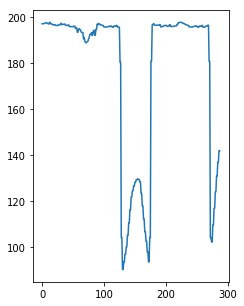

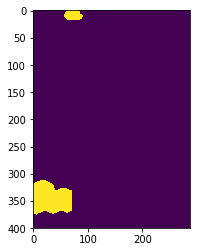

In [121]:
t = find_mask_position(image, 0, 100)
plt.imshow(t)

In [5]:
%%time

def get_region_proposals(image):
    means = image.mean(axis=0)[:, 2]
    points = np.where(means <= means.max() - 10)[0]

    regions = []
    begin, end = points[0], points[0]

    for point in points[1:]:
        if point - end > 5:
            regions.append((begin, end))
            begin = point
        end = point
    regions.append((begin, points[-1]))
    
    return regions

def make_fg_mask(image, regions):
    mask = np.zeros_like(image).astype(bool)
    
    for begin, end in regions:
        mask[:, begin-5:end+5] = True
        
    return mask

def find_mask_position(img, x, width):
    rect = (x, 0, width, 400)
    
    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)
    
    mask = np.zeros(img.shape[:2],np.uint8)
    cv2.grabCut(img,mask,rect,bgdModel,fgdModel,3,cv2.GC_INIT_WITH_RECT)
    mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')
    
    return mask

def find_mask(image, to_analyze):
    mask = np.zeros(image.shape[:2],np.uint8)
    
    for x, block_width in to_analyze:
        mask |= find_mask_position(image, x, block_width)
    
    return mask

def find_tubes(image):
    regions = get_region_proposals(image)
    refined_regions = []
    refine_width = 6
    
    for begin, end in regions:
        x = begin - refine_width
        width = end - begin + 2 * refine_width
        refined_regions.append((x, width))
        
    return find_mask(image, refined_regions)

CPU times: user 3 µs, sys: 3 µs, total: 6 µs
Wall time: 9.54 µs


In [254]:
#%%time

def get_region_proposals(image):
    means = image.mean(axis=0)[:, 2]
    points = np.where(means <= means.max() - 10)[0]

    regions = []
    begin, end = points[0], points[0]

    for point in points[1:]:
        if point - end > 5:
            regions.append((begin, end))
            begin = point
        end = point
    regions.append((begin, points[-1]))
    
    return regions

def make_fg_mask(image, regions):
    mask = np.zeros(image.shape[:2]).astype(np.uint8)
    
    for begin, end in regions:
        mask[:, begin-5:end+5] = 1
        
    return mask

def find_mask(image, fg_mask):
    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)
    
    mask = fg_mask#np.zeros(img.shape[:2],np.uint8)
    cv2.grabCut(image,mask,None,bgdModel,fgdModel,10,cv2.GC_INIT_WITH_MASK)
    mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')
    
    return mask

def find_tubes(image):
    regions = get_region_proposals(image)
    fg_mask = make_fg_mask(image, regions)
        
    return find_mask(image, fg_mask)



In [46]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread("flappy-bird-small.jpg")              # img.shape : (413, 620, 3)
   # img.shape[:2] = (413, 620)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (300,0,150,600)

# this modifies mask 
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)

# If mask==2 or mask== 1, mask2 get 0, other wise it gets 1 as 'uint8' type.
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')

# adding additional dimension for rgb to the mask, by default it gets 1
# multiply it with input image to get the segmented image
img_cut = img*mask2[:,:,np.newaxis]
plt.figure(figsize=(20, 10))
plt.subplot(211),plt.imshow(img)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(212),plt.imshow(img_cut)
plt.title('Grab cut'), plt.xticks([]), plt.yticks([])
plt.show()

ValueError: operands could not be broadcast together with shapes (694,488,3) (400,288,1) 

In [5]:
import gym
from gym.wrappers import Monitor
import gym_ple

couldn't import doomish
Couldn't import doom


In [6]:
env = gym.make('FlappyBird-v0')

WARN: Environment '<class 'gym_ple.ple_env.PLEEnv'>' has deprecated methods '_step' and '_reset' rather than 'step' and 'reset'. Compatibility code invoked. Set _gym_disable_underscore_compat = True to disable this behavior.


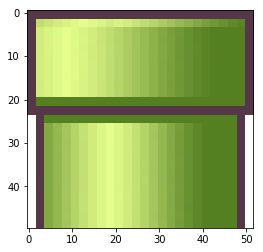

In [44]:
from skimage.io import imread

tube = imread("pics/pipe-green.png")[:50, :]
plt.imshow(tube)

In [23]:
template.shape

(75, 52)

In [43]:
loc

(array([152, 153, 153, 153, 153, 154, 154, 155]),
 array([154, 153, 154, 155, 156, 154, 155, 154]))

In [80]:

from sklearn.preprocessing import scale

dbscan = DBSCAN(min_samples=2, eps=1e1)
pts = np.vstack(loc).T
nums = dbscan.fit_predict(pts)
print(nums)
pts[np.where(nums != -1)]

[0 0 0 0 0 1 1 1 1 1]


array([[244,  54],
       [245,  53],
       [245,  54],
       [245,  55],
       [246,  54],
       [252, 198],
       [253, 197],
       [253, 198],
       [253, 199],
       [254, 198]])

NameError: name 'env' is not defined

In [2]:
state = s

NameError: name 's' is not defined